# Data Cleaning for Text Summarization

Data source:
<br> https://www.kaggle.com/snap/amazon-fine-food-reviews
<br> Code adpated from:
<br> https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

In [1]:
# Import modules and packages
import nltk
import string
import numpy as np  
import pandas as pd 
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

## Read in Text

In [2]:
# load data
df = pd.read_csv("Reviews.csv", nrows=10000)
df.drop_duplicates(subset=['Text'], inplace=True)
df.dropna(axis=0,inplace=True)
df = df.loc[:,['Text','Summary']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9513 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     9513 non-null   object
 1   Summary  9513 non-null   object
dtypes: object(2)
memory usage: 223.0+ KB


In [3]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [4]:
# Clean Text
stop_words = set(stopwords.words('english'))

def clean_text(text, num):
    """
    This function takes a string as input, performs these operations: 
        - lower case, remove unwanted punctuation, apostrophe 's
        - contraction mapping
        - removes any stopwords and short words
        - not enough memory for mdoel to process all numerical features, so removed here
    """ 
    # Lower case
    t1 = text.lower()
    # Remove html tags
    t1 = BeautifulSoup(t1, "lxml").text
    # remove any text inside parentheses
    t1 = re.sub(r'\([^)]*\)', '', t1)
    # remove speechmarks
    t1 = re.sub('"','', t1)
    # contraction mapping
    t1 = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in t1.split(" ")])
    # remove apostrophe 's
    t1 = re.sub(r"'s\b","", t1)
    # remove unwanted punctuation
    t1 = re.sub("[^a-zA-Z]", " ", t1)
    # remove repeat expression sounds
    t1 = re.sub('[m]{2,}', 'mm', t1)     
    # Remove stopwords in text
    if(num==0):
        tokens = [w for w in t1.split() if not w in stop_words]
    else:
        tokens = t1.split()
    # Remove short words in summary
    long_words=[]
    for i in tokens:
        if len(i) > 1:
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df.Text:
    cleaned_text.append(clean_text(t,0))
df['cleaned_text']=cleaned_text

cleaned_summary = []
for t in df.Summary:
    cleaned_summary.append(clean_text(t,1))
df['cleaned_summary']=cleaned_summary

# Review the cleaned dataset
df.head()

,Text,Summary,cleaned_text,cleaned_summary
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,Good Quality Dog Food,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,good quality dog food
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not as Advertised,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,not as advertised
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...","""Delight"" says it all",confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,delight says it all
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,Cough Medicine,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,cough medicine
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Great taffy,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,great taffy


In [5]:
# Remove duplicates and drop na
df.drop_duplicates(subset=['cleaned_text'], inplace=True)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             9500 non-null   object
 1   Summary          9500 non-null   object
 2   cleaned_text     9500 non-null   object
 3   cleaned_summary  9500 non-null   object
dtypes: object(4)
memory usage: 371.1+ KB


## EDA

Plot the text and summary lengths to gain overview of distribution, then set the 95th percentile length as maximum length for model.

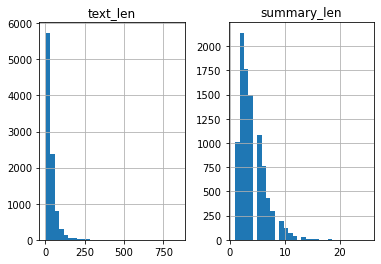

          text_len  summary_len
count  9500.000000  9500.000000
mean     36.596105     3.936211
std      34.278891     2.448014
min       4.000000     1.000000
25%      16.000000     2.000000
50%      26.500000     3.000000
75%      45.000000     5.000000
max     845.000000    25.000000
{'95th percentile text length: ': 96, '95th percentile summary length: ': 9}


In [6]:
# Plot word length distribution
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

df['text_len'] = text_word_count
df['summary_len'] = summary_word_count
        
df.hist(bins = 30)
plt.savefig('eda')
plt.show()

print(df.describe())

print({"95th percentile text length: " : int(np.percentile(df.text_len, 95)),
       "95th percentile summary length: " : int(np.percentile(df.summary_len, 95))})

In [7]:
# Set maximum length of inputs to model
max_text_len = 30
max_summary_len = 8

# Select data with lengths less than or equal to specofied max lengths
df_m = df[df.text_len<=max_text_len][df.summary_len<=max_summary_len] 
print(df_m.describe())

          text_len  summary_len
count  5302.000000  5302.000000
mean     18.070162     3.207280
std       6.215945     1.703287
min       4.000000     1.000000
25%      13.000000     2.000000
50%      17.000000     3.000000
75%      23.000000     4.000000
max      30.000000     8.000000


In [8]:
# Add unique start and end cues to the summary text
df_m['cleaned_summary'] = df_m['cleaned_summary'].apply(lambda x : 'sumhajime '+ x + ' sumowari')

In [9]:
# Check text
df_m.iloc[0,3]

'sumhajime good quality dog food sumowari'

In [10]:
df_m.head()

,Text,Summary,cleaned_text,cleaned_summary,text_len,summary_len
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,Good Quality Dog Food,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,sumhajime good quality dog food sumowari,23,4
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not as Advertised,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,sumhajime not as advertised sumowari,18,3
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,Cough Medicine,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,sumhajime cough medicine sumowari,17,2
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Great taffy,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,sumhajime great taffy sumowari,13,2
6,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, ...",Great! Just as good as the expensive brands!,saltwater taffy great flavors soft chewy candy individually wrapped well none candies stuck together happen expensive version fralinger would highly recommend candy served beach themed party every...,sumhajime great just as good as the expensive brands sumowari,28,8


In [11]:
df_m.to_csv('data.csv')  